# EDA

## Imports

In [45]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [46]:
# Import data
df_original = pd.read_csv("datasets/after_data_wrangling.csv")
df = df_original.copy()
df.columns = [i.lower() for i in df.columns]
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Datetime

In [47]:
# Add date breakdown
date_df = df[["date"]]
df.drop("date",axis=1,inplace=True)
df.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [48]:
date_df.head()

,date
0,05-02-2010
1,12-02-2010
2,19-02-2010
3,26-02-2010
4,05-03-2010


In [49]:
date_df["date"] = pd.to_datetime(date_df["date"])
date_df.head()

,date
0,2010-05-02
1,2010-12-02
2,2010-02-19
3,2010-02-26
4,2010-05-03


In [50]:
date_df["weekday"] = date_df.date.dt.weekday
date_df["month"] = date_df.date.dt.month
date_df["year"] = date_df.date.dt.year
date_df.head()

,date,weekday,month,year
0,2010-05-02,6,5,2010
1,2010-12-02,3,12,2010
2,2010-02-19,4,2,2010
3,2010-02-26,4,2,2010
4,2010-05-03,0,5,2010


## Feature break down

In [51]:
target = "weekly_sales"
features = [i for i in df.columns if i != target]
len(features), features

(6,
 ['store', 'holiday_flag', 'temperature', 'fuel_price', 'cpi', 'unemployment'])

In [52]:
# Checking number of unique rows in each feature
n_unique_per_column = df.nunique().sort_values()
n_unique_per_column

holiday_flag       2
store             45
unemployment     349
fuel_price       892
cpi             2145
temperature     3528
weekly_sales    6435
dtype: int64

In [53]:
# Numerical & categorical features
numeric_feat = []
cat_feat = []

for feature in features:
    if n_unique_per_column[feature] <= 45:
        cat_feat.append(feature)
    else:
        numeric_feat.append(feature)

print(f"There are {len(numeric_feat)} numerical and {len(cat_feat)} categorical features.\n")

for feature in numeric_feat:
    coef = np.corrcoef(df[feature],df['weekly_sales'])
    print(f"The correlation coefficient between weekly sales and {feature} is {coef[0][1]}")

There are 4 numerical and 2 categorical features.

The correlation coefficient between weekly sales and temperature is -0.06381001317946958
The correlation coefficient between weekly sales and fuel_price is 0.009463786314475132
The correlation coefficient between weekly sales and cpi is -0.07263416204017625
The correlation coefficient between weekly sales and unemployment is -0.10617608965795416


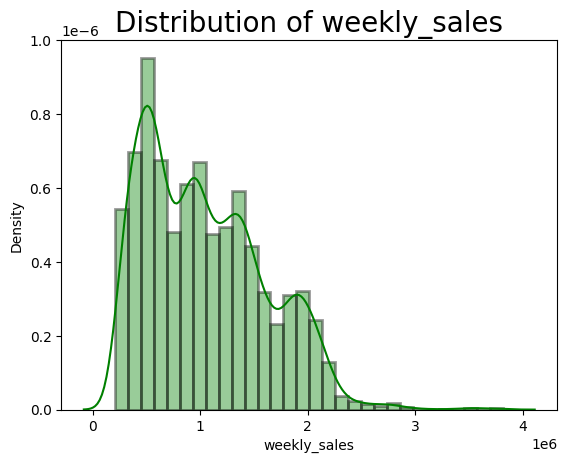

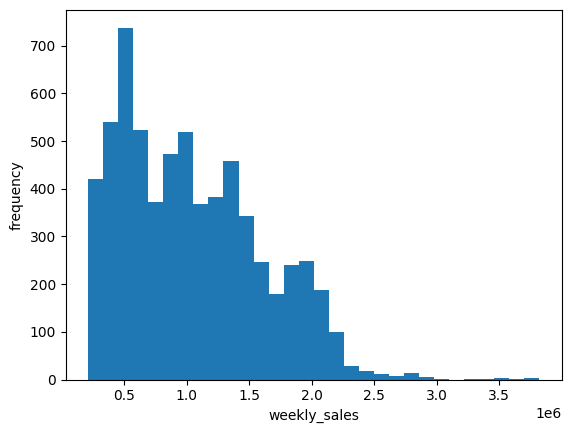

In [54]:
# Distribution of the target variable
sns.distplot(df[target],color="g",hist_kws=dict(edgecolor="black",linewidth=2),bins=30)
plt.title("Distribution of weekly_sales",size=20)
plt.show()
plt.hist(df[target],bins=30,label="weekly_sales")
plt.xlabel("weekly_sales")
plt.ylabel("frequency")
plt.show()

## Categorical Features

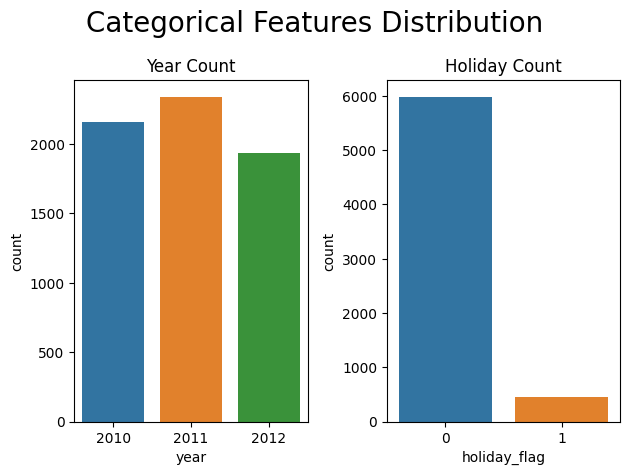

In [55]:
# Categorical features
plt.subplot(1, 2, 1)
sns.countplot(x ="year",data=date_df).set(title="Year Count")

plt.subplot(1, 2, 2)
sns.countplot(x ="holiday_flag",data=df).set(title="Holiday Count")

plt.suptitle("Categorical Features Distribution",size=20)

plt.tight_layout()
plt.show()

## Numeric Features

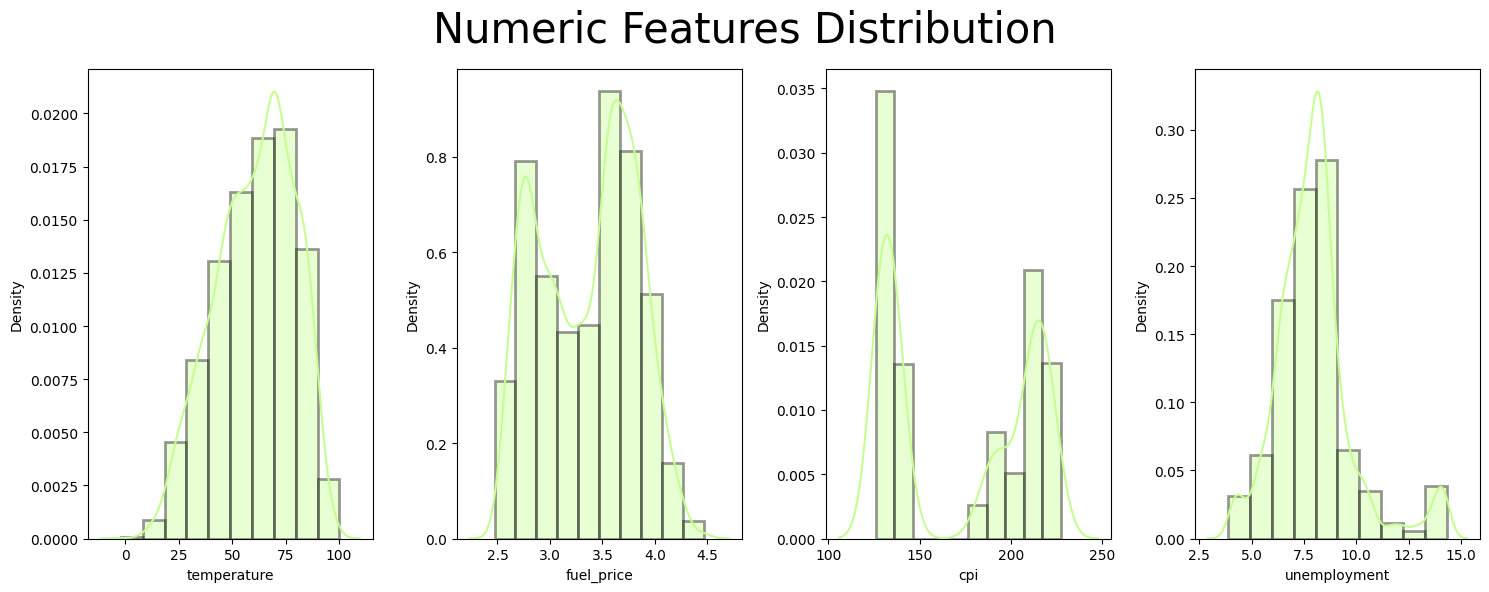

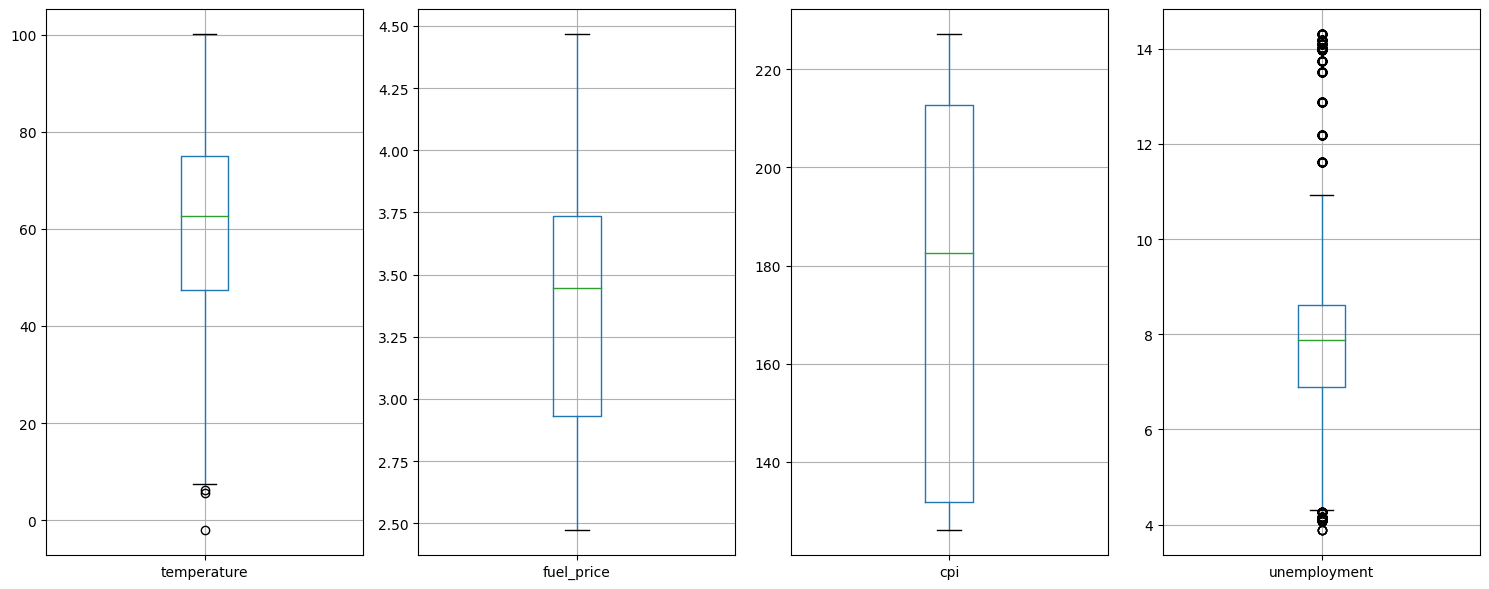

In [56]:
# Numeric features
n_col_fig = 4
n_row_fig = math.ceil(len(numeric_feat)/n_col_fig)

fig = plt.figure(figsize=[15, 6 * n_row_fig])
fig.suptitle("Numeric Features Distribution",size=30)

color = list(np.random.randint([255,255,255])/255)

for i in range(len(numeric_feat)):
    plt.subplot(n_row_fig, n_col_fig, i+1)
    sns.distplot(df[numeric_feat[i]],hist_kws=dict(edgecolor="black",linewidth=2),bins=10,color=color)
plt.tight_layout()
plt.show()

plt.figure(figsize=[15, 6 * n_row_fig])

for i in range(len(numeric_feat)):
    plt.subplot(n_row_fig, n_col_fig, i+1)
    df.boxplot(numeric_feat[i])
    plt.tight_layout()

plt.show()

In [57]:
date_df

,date,weekday,month,year
0,2010-05-02,6,5,2010
1,2010-12-02,3,12,2010
2,2010-02-19,4,2,2010
3,2010-02-26,4,2,2010
4,2010-05-03,0,5,2010
...,...,...,...,...
6430,2012-09-28,4,9,2012
6431,2012-05-10,3,5,2012
6432,2012-12-10,0,12,2012
6433,2012-10-19,4,10,2012


## To Do

These are some further steps to consider

* Find top store for various summary statistics
* Perform PCA on features
* Create custom features and drop pre-existing features
* Check repeatability/consistency/regularity of reported dates
* Obtain feature correlation heatmap
* Get scatterplots of numeric features against weekly_sales

## Saving data

In [58]:
# 1
# df.to_csv("datasets/after_eda_walmart.csv")
# date_df.to_csv("datasets/after_eda_date.csv")

# 2
from library.sb_utils import save_file
datapath = "datasets"
save_file(df,"after_eda_walmart.csv",datapath)
save_file(date_df,"after_eda_date.csv",datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file. "datasets\after_eda_walmart.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file. "datasets\after_eda_date.csv"
